# Analysis on the preference in Amazon products on Amazon searches
By Sergio González

## Introduction and importance of the investigation
Amazon is used for e-commerce worldwide, and most of the time, if we are looking for a specific product, we use the search bar. We would expect that Amazon gives us the results that best fit our search, **however, some of the result products may be sponsored _even without explicit warning_**.

Because of this, this investigation will explore the possibility of **creating a machine learning algorithm that can predict whether a product is owned** (and maybe secretly favored in the results) **by Amazon**, judging by its general information on the search result. 

This algorithm could then be used to create **a filter that prevents secret ads in your search results**, creating an ad-free search result. 

This last step _will not be done by me_. I will only explore the data analysis and machine learning algorithm.


### This document's objective
In this .ipynb file, the data from ["Amazon Brands and Exclusives" dataset](https://www.kaggle.com/datasets/thedevastator/amazon-s-dominance-in-e-commerce-why-you-should) will be analyzed. 

The objective of this document is to verify if Amazon and non-Amazon products can be distinguished with the characteristics of this dataset. If the results are positive, then a machine learning model will be created to test the results. 

In all the analysis, since we have the same number of products in each type of product (by ignoring the incomplete rows), we can do a fair analysis by comparing the number of products with a certain number of reviews, stars, or position. 

## Reviews analysis

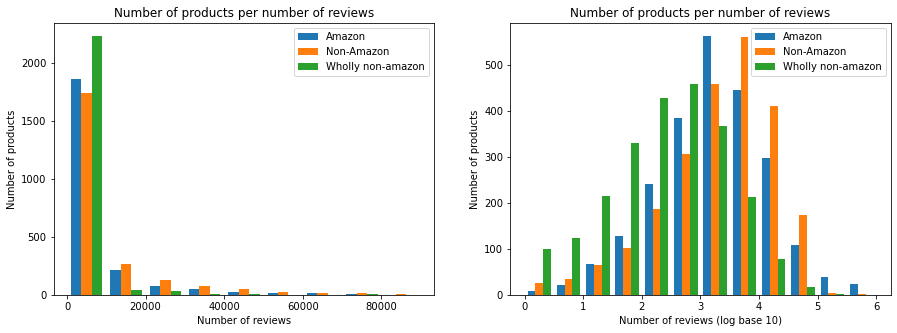

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Import all data
df = pd.read_csv("Amazon Brands and Exclusives/quality_and_sales_comparisons.csv")

# Clean and process the review data
df = df.dropna()
reviews_data = df[["amazon_reviews", "non_amazon_reviews", "wnon_amazon_reviews"]]
# Use log base 10 because of the big differences in the magnitude of the data
reviews_data_log10 = reviews_data.applymap(lambda x: math.log(x, 10))

# Plotting 2 histograms
plt.rcParams['figure.figsize'] = [15, 5];
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plotting histogram of original data
bins = list(np.arange(0, 100000, 10000))
ax1.hist(reviews_data, bins, label=["Amazon", "Non-Amazon", "Wholly non-amazon"])
ax1.legend(loc='best')
ax1.set_title("Number of products per number of reviews")
ax1.set_ylabel("Number of products")
ax1.set_xlabel("Number of reviews")

# Plotting histogram of data with log applied
bins = list(np.arange(0, 6.5, 0.5))
ax2.hist(reviews_data_log10, bins, label=["Amazon", "Non-Amazon", "Wholly non-amazon"])
ax2.legend(loc='best')
ax2.set_title("Number of products per number of reviews")
ax2.set_ylabel("Number of products")
ax2.set_xlabel("Number of reviews (log base 10)");


On the graph with the original data, it looks like the data is *not normally distributed*, on all 3 categories. It can be quite hard to see what's happening on the first figure, so let's look at the graph with the log applied to the data. 

Firstly, wholly non-amazon products seem to have *lower number of reviews*, but still having a good number of products with more than 100 or 1000 reviews. Nonetheless, it is clear that **Amazon and non-amazon products have many more reviews than wholly non-amazon products**. Amazon products have a lot more products with more than 100,000 reviews also, while the other 2 categories have barely any between the 5 and 6 range of reviews. 

Still, surprisingly, it seems that non-amazon products have the most products with more reviews in the range of 3.5 and 5 in the data with log base 10 applied, as it can be seen by the higher peaks in this range.  

Finally, since the data is not normally distributed, and we are dealing with discrete data, I will use the **Mann Whitney U Test** for each pair of data. The alpha chosen to reject the null hypothesis is 0.05. 


In [2]:
from scipy.stats import mannwhitneyu

# Calculate the p value per group
U1, p_reviews_amazon_nAmazon = mannwhitneyu(reviews_data["amazon_reviews"], reviews_data["non_amazon_reviews"])
U1, p_reviews_amazon_wnAmazon = mannwhitneyu(reviews_data["amazon_reviews"], reviews_data["wnon_amazon_reviews"])
U1, p_reviews_namazon_wnAmazon = mannwhitneyu(reviews_data["non_amazon_reviews"], reviews_data["wnon_amazon_reviews"])

print(f"""p-value for each test between the groups:
    Amazon and non-Amazon: \t\t{p_reviews_amazon_nAmazon}
    Amazon and wholly non-Amazon: \t{p_reviews_amazon_wnAmazon}
    Non-Amazon and wholly non-Amazon: \t{p_reviews_namazon_wnAmazon}""")

p-value for each test between the groups:
    Amazon and non-Amazon: 		9.016317822649823e-08
    Amazon and wholly non-Amazon: 	1.869189428723513e-164
    Non-Amazon and wholly non-Amazon: 	3.596672614992812e-204


As shown by the statistical test, all the pairs of data have a significant difference between each other, as the p-value is extremely low of all of them (lower than 0.05). Thus, **the null hypothesis can be rejected** for every pair. 

Now, let's continue with the stars rating analysis.

## Starts rating analysis

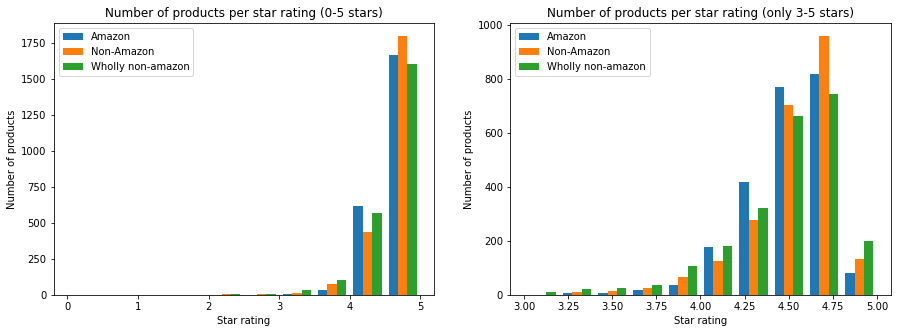

In [3]:
# Getting stars data
stars_data = df[["amazon_stars", "non_amazon_stars", "wnon_amazon_stars"]]

# Plotting 2 histograms
plt.rcParams['figure.figsize'] = [15, 5];
fig, (ax1, ax2) = plt.subplots(1, 2)

bins = list(np.arange(0, 5.2, 0.5))
ax1.hist(stars_data, bins, label=["Amazon", "Non-Amazon", "Wholly non-amazon"]);
ax1.legend(loc='best')
ax1.set_title("Number of products per star rating (0-5 stars)")
ax1.set_ylabel("Number of products")
ax1.set_xlabel("Star rating")

# Second graph was created to focus on a specific range of stars where most of the data is in. This way we get more details
bins = list(np.arange(3, 5.2, 0.2))
ax2.hist(stars_data, bins, label=["Amazon", "Non-Amazon", "Wholly non-amazon"]);
ax2.legend(loc='best')
ax2.set_title("Number of products per star rating (only 3-5 stars)")
ax2.set_ylabel("Number of products")
ax2.set_xlabel("Star rating");

Looking at the first graph, it seems that this time **non-Amazon products were the ones with better rating overall**. 
However, by taking a closer look in the second graph, wholly non-amazon products seem to have the most products with almost 5 stars of rating. Even so, non-Amazon products seem to be close to the top. 

Next, it's time to perform a statistical test to see if there is a significant difference between the product types. In this case, the data is not normally distributed and is continuous. Thus, a nonparametric test for discrete data will be used, which is **Mann Whitney U Test**. Our alpha will be 0.05. 

In [4]:
# Calculate the p value per group
U1, p_stars_amazon_nAmazon = mannwhitneyu(stars_data["amazon_stars"], stars_data["non_amazon_stars"])
U1, p_stars_amazon_wnAmazon = mannwhitneyu(stars_data["amazon_stars"], stars_data["wnon_amazon_stars"])
U1, p_stars_namazon_wnAmazon = mannwhitneyu(stars_data["non_amazon_stars"], stars_data["wnon_amazon_stars"])

print(f"""p-value for each test between the groups:
    Amazon and non-Amazon: \t\t{p_stars_amazon_nAmazon}
    Amazon and wholly non-Amazon: \t{p_stars_amazon_wnAmazon}
    Non-Amazon and wholly non-Amazon: \t{p_stars_namazon_wnAmazon}""")

p-value for each test between the groups:
    Amazon and non-Amazon: 		2.665946655824706e-11
    Amazon and wholly non-Amazon: 	0.9706251194311925
    Non-Amazon and wholly non-Amazon: 	1.4759612420499431e-08


The results indicate that **the only pair of groups that did not reject the null hypothesis (p value lower than 0.05) were Amazon and wholly non-Amazon**. This is very surprising, since I anticipated before the analysis that these would be the most different groups, since one is probably promoted secretly by Amazon, while the other is definitely not. 

Still, there seems to be quite the difference between the other groups. It can then be argued that this feature could still be useful for a learning algorithm, as it can be used to differentiate between at least 2 groups.

Let's continue with the analysis of the products' position in the search result.

## Position analysis

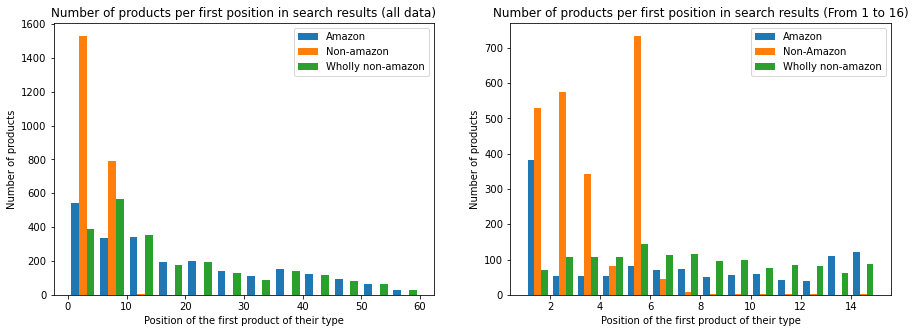

In [5]:
# Getting position data
df.rename(columns={"position_first_wholly_non_amazon": "position_first_wnon_amazon"}, inplace=True)
position_data = df[["position_first_amazon", "position_first_non_amazon", "position_first_wnon_amazon"]]


# Plotting 2 histograms
plt.rcParams['figure.figsize'] = [15, 5];
fig, (ax1, ax2) = plt.subplots(1, 2)

# Histogram for all data
bins = list(np.arange(0, 61, 5))
ax1.hist(position_data, bins, label=["Amazon", "Non-amazon", "Wholly non-amazon"]);
ax1.legend(loc='best')
ax1.set_title("Number of products per first position in search results (all data)")
ax1.set_ylabel("Number of products")
ax1.set_xlabel("Position of the first product of their type");

# Histogram focusing on top 15 placements
bins = list(np.arange(1, 16, 1))
ax2.hist(position_data, bins, label=["Amazon", "Non-Amazon", "Wholly non-amazon"]);
ax2.legend(loc='best')
ax2.set_title("Number of products per first position in search results (From 1 to 16)")
ax2.set_ylabel("Number of products")
ax2.set_xlabel("Position of the first product of their type");

Looking at the first graph, we can see that **non-Amazon products appear much more in the first group of results** compared to Amazon and wholly non-Amazon products. This massive difference is quite suspicious, and it would be pretty unlikely that it would happen just by chance. 

On the other hand, on the first histogram, there doesn't seem to be a noticeable difference between Amazon and wholly non-Amazon products. Nonetheless, the second graph shows that **Amazon products appear much more frequently on the first spot** compared to wholly non-Amazon ones (although still less than non-amazon products). 

Regarding the statistical testing to see if there is significant difference between the data, the data is discrete and not normally distributed, so **Mann Whitney U Test** will be used with an alpha value of 0.05. 

In [6]:
# Calculate the p value per group
U1, p_position_amazon_nAmazon = mannwhitneyu(position_data["position_first_amazon"], position_data["position_first_non_amazon"])
U1, p_position_amazon_wnAmazon = mannwhitneyu(position_data["position_first_amazon"], position_data["position_first_wnon_amazon"])
U1, p_position_namazon_wnAmazon = mannwhitneyu(position_data["position_first_non_amazon"], position_data["position_first_wnon_amazon"])

print(f"""p-value for each test between the groups:
    Amazon and non-Amazon: \t\t{p_position_amazon_nAmazon}
    Amazon and wholly non-Amazon: \t{p_position_amazon_wnAmazon}
    Non-Amazon and wholly non-Amazon: \t{p_position_namazon_wnAmazon}""")

p-value for each test between the groups:
    Amazon and non-Amazon: 		4.8836967868989865e-304
    Amazon and wholly non-Amazon: 	0.8190073742364754
    Non-Amazon and wholly non-Amazon: 	0.0


As we would expect by looking that the graphs, **non-Amazon products were very statistically different compared to the products of the other 2 categories** (p values extremely lower than 0.05). 

On the other hand, *Amazon and wholly non-Amazon products were not significantly different*, reaching a very high p value. 

Still, the big difference between some of the groups in this regard is big enough for it to be possible to try to classify products using this characteristic as a feature.

## Conclusions
With the above analysis, it can be determined that **all 3 of the above characteristics can be used to a certain extent as features for machine learning**.

Even if in some characteristics some groups were similar, I believe that if the algorithm analyzes the features together it could still determine the type of product based on this data. 

Now, it's time to test whether these features are good enough for a machine learning algorithm. This is done in the other .ipynb document that should be grouped with this one.

_This document was created by Sergio González. The other file of this project can be found in my GitHub_ https://github.com/SergioGzzBrz/My-projects